In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv

In [21]:
data_path = 'new_data.csv'
# url = 'https://www.kaggle.com/code/shahraizanwar/age-gender-ethnicity-prediction/data?select=age_gender.csv'

In [22]:
data = pd.read_csv(data_path)

In [23]:
data.columns

Index(['age', 'gender', 'ethnicity', 'image'], dtype='object')

In [24]:
data

,age,gender,ethnicity,image
0,62,0.0,0,"[102, 142, 111, 117, 128, 100, 119, 129, 102, ..."
1,4,1.0,0,"[0, 43, 26, 15, 32, 22, 28, 39, 31, 37, 37, 30..."
2,13,1.0,0,"[203, 17, 17, 128, 6, 6, 164, 42, 42, 159, 37,..."
3,34,1.0,0,"[245, 247, 242, 232, 235, 223, 198, 197, 177, ..."
4,58,0.0,0,"[127, 128, 133, 127, 128, 133, 128, 129, 134, ..."
...,...,...,...,...
20840,30,1.0,3,"[0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, ..."
20841,28,0.0,3,"[247, 16, 15, 230, 51, 50, 230, 51, 50, 228, 5..."
20842,26,1.0,3,"[0, 10, 14, 9, 20, 26, 0, 10, 14, 0, 11, 15, 0..."
20843,60,0.0,3,"[47, 69, 60, 63, 64, 53, 63, 66, 50, 66, 63, 5..."


In [28]:
data['image'][0]

'[102, 142, 111, 117, 128, 100, 119, 129, 102, 117, 123, 94, 119, 127, 100, 113, 124, 103, 102, 117, 101, 43, 60, 48, 51, 60, 49, 74, 73, 60, 122, 107, 92, 146, 122, 105, 158, 126, 106, 171, 141, 121, 175, 146, 125, 162, 133, 112, 163, 132, 112, 170, 136, 117, 177, 141, 123, 184, 145, 128, 188, 148, 128, 190, 150, 129, 193, 153, 132, 195, 155, 134, 196, 156, 136, 200, 157, 137, 199, 155, 135, 196, 148, 130, 193, 145, 127, 189, 143, 115, 186, 141, 112, 180, 137, 105, 176, 132, 99, 171, 130, 98, 154, 115, 85, 140, 105, 78, 121, 90, 66, 108, 80, 60, 88, 73, 56, 70, 64, 52, 54, 62, 55, 33, 50, 48, 8, 32, 32, 0, 26, 29, 8, 35, 32, 13, 33, 23, 66, 80, 62, 111, 120, 94, 116, 127, 99, 130, 114, 89, 132, 116, 91, 128, 111, 82, 125, 109, 83, 129, 116, 97, 95, 85, 72, 69, 58, 48, 75, 57, 47, 118, 87, 74, 159, 112, 97, 172, 115, 98, 186, 124, 109, 198, 136, 121, 200, 138, 123, 196, 134, 119, 197, 137, 122, 199, 140, 124, 199, 137, 122, 206, 143, 128, 209, 143, 128, 209, 146, 129, 211, 148, 131, 21

# Loading data from google cloud to google colab

In [6]:
# from google.colab import drive 
# drive.mount('/content/gdrive')
# df=pd.read_csv('gdrive/My Drive/age_gender.csv')

 # Transforming the pixels data type into a list of float

In [7]:
# images =[]
# for fotos in range(len(data['pixels'])):
#     X = data['pixels'][fotos].split(" ")
#     X = list(map(int, X))
#     images.append(X)

In [8]:
# x = np.reshape(images[5000], (48,48))

In [9]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [10]:
blob = data['pixels'][3584].reshape(48,48)

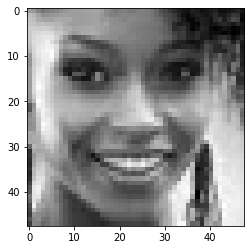

In [11]:
plt.imshow(blob, cmap='gray');

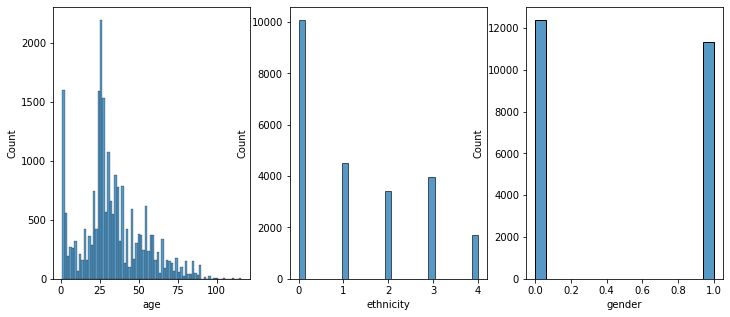

In [12]:
#sns.displot(data['ethnicity']),
#sns.displot(data['gender']), 
#sns.displot(data['age']);
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(ax=axes[0], x=data['age']);
sns.histplot(ax=axes[1], x=data['ethnicity']);
sns.histplot(ax=axes[2], x=data['gender']);

# Reduce data for kids between 0 and 5 years old

In [13]:
under_5s = []

for i in range(len(data)):
    if data['age'].iloc[i] <= 5:
        under_5s.append(data.iloc[i])
under_5s = pd.DataFrame(under_5s)
under_5s = under_5s.sample(frac=0.3)

data = data[data['age'] > 5]

data = pd.concat([data, under_5s], ignore_index = True)

/home/pablo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

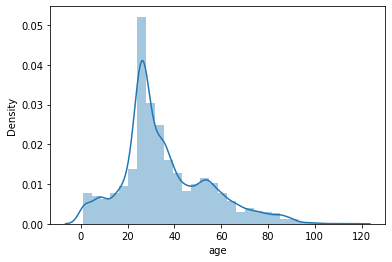

In [14]:
sns.distplot(data['age'],kde=True, bins=30)

In [15]:
data = data[data['age'] < 80]

/home/pablo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

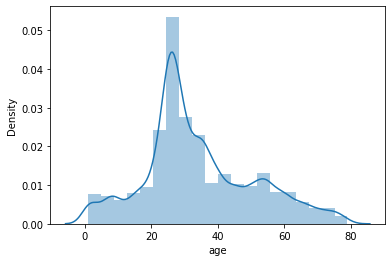

In [16]:
sns.distplot(data['age'],kde=True, bins=20)

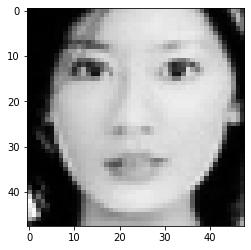

In [17]:
blob = data['pixels'][3584].reshape(48,48)
plt.imshow(blob, cmap='gray');

# Working with the age

In [18]:
# list the number of counts per age
ages = data['age'].unique()
counts = []
for age in ages:
    counts.append(np.count_nonzero(data['age']==age))

In [19]:
# table with the first 15 most dense samples regarding age
type(ages), type(counts)
s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
s=s.transpose()
more_dense = s.sort_values(by=['counts'], ascending=False)
more_dense.head(15)

,ages,counts
16,26,2197
18,28,918
25,35,880
14,24,859
15,25,734
20,30,724
22,32,664
17,27,615
19,29,570
30,40,526


In [20]:
reset_index

NameError: name 'reset_index' is not defined

# Function for transforming data numbers into data range classification

In [ ]:
# categorize age per range:
def age_categorize(input_list, age_step=10):
    '''
    Enter the list of age into input_list and the age steps
    with : age_step = 5;  age = 4   =>  1-5
                          age = 12  =>  10-15                        
    '''
    
    cat_age = []
    for age in input_list:
        
        a = float(age)/float(age_step)
        
        if a > 1:
            entero = int(a)
            coma = a-entero
            
            if coma > 0:
                entero = entero+1
            
            max = entero * age_step
            min = max-(age_step-1)     
            cat_age.append(f'{min} to {max}')
        else:
            min = 1
            max = age_step
            cat_age.append(f'{min} to {max}')
            
    return cat_age

In [ ]:
step_size = 3
input_list = data['age']
cat7 = age_categorize(input_list)

In [ ]:
pd.DataFrame(cat, data['age'].values).sample(100)

In [ ]:
input_list = data['age'].unique

In [ ]:
data['ethnicity'].unique()

# Here we go with the model

In [ ]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

In [ ]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y = data['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen=ImageDataGenerator(rescale=1/255)
# train_generator_age=train_datagen.flow(
#     X_train ,y_train ,batch_size=32)

# test_datagen=ImageDataGenerator(rescale=1/255)
# test_generator_age=test_datagen.flow(
#     X_test ,y_test ,batch_size=32)

In [ ]:
def initialize_model():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

In [ ]:
model = initialize_model()
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# earlystop=EarlyStopping(patience=6)
# learning_rate_reduction=ReduceLROnPlateau(
#     monitor='val_acc',
#     patience= 3,
#     verbose=1,
# )
# callbacks = [earlystop, learning_rate_reduction]

In [ ]:
X_train.shape

In [ ]:
# history_age = model.fit(
#     train_generator_age, 
#     epochs= 60,
#     validation_data= test_generator_age,
#     callbacks= callbacks)

In [ ]:
history = model.fit(X_train, y_train, epochs=80, callbacks=[es])

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=100, callbacks=[es], batch_size=32)

In [ ]:
history.__dict__

In [ ]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

In [ ]:
# models.save_model(model, 'Model48')
model = models.load_model('Model48')

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
n=542
plt.imshow(X[n], cmap='gray');
y_test.iloc[n]

In [ ]:
#out= model.predict(X_test)
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp)[0,0]

In [ ]:
np.shape(X[0])

In [ ]:
X.head

# best results using colab

In [ ]:
# import requests
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import io
# import csv

# from google.colab import drive 
# drive.mount('/content/gdrive')
# data=pd.read_csv('gdrive/My Drive/age_gender.csv')

# data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

# from tensorflow.keras import Sequential, layers, models
# from tensorflow.keras import optimizers
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.layers.experimental.preprocessing import Rescaling
# from sklearn.model_selection import train_test_split

# X = data['pixels'].tolist()
# X = np.reshape(X, (-1, 48, 48,1))

# y = data['age']


# def initialize_model():
    
#     model = Sequential()
#     model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
#     model.add(layers.MaxPool2D(pool_size=(2,2)))

#     model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
#     model.add(layers.MaxPool2D(pool_size=(2,2)))
   
#     model.add(layers.Conv2D(64,(3,3),activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Dropout(0.2))

#     model.add(layers.Conv2D(128,(3,3),activation='relu'))
#     model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Dropout(0.2))          

#     model.add(layers.Flatten())
#     model.add(layers.Dropout(0.5))
    
#     model.add(layers.Dense(1, activation='relu'))
   
#     return model

# model = initialize_model()
# model.summary()

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# from tensorflow.keras.callbacks import EarlyStopping

# es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# history = model.fit(X_train, y_train, epochs=100, callbacks=[es])

# plt.plot(history.history['loss']);
# plt.plot(history.history['mae']);

# n=5
# out = np.reshape(X_test[n], (48, 48))
# plt.imshow(out, cmap='gray');
# y_test.iloc[n]

# try_inp = np.expand_dims(X_test[n], axis=0)
# model.predict(try_inp)[0,0]